# Necessary Libraries

This code imports all necessary libraries for tabular regression with the diabetes dataset:

### Data Science Stack
- `numpy`: Numerical computing and array operations
- `pandas`: Data manipulation and analysis
- `matplotlib.pyplot`: Data visualization
- `seaborn`: Statistical data visualization

### Machine Learning
- `load_diabetes`: Diabetes dataset from scikit-learn (442 samples, 10 features)
- `train_test_split`: Data partitioning into train/test sets
- `StandardScaler`: Feature normalization
- `RandomForestRegressor`: Ensemble regression model
- `LinearRegression`: Baseline linear regression model
- `mean_squared_error`, `mean_absolute_error`, `r2_score`: Regression metrics

### Deep Learning
- `torch`: PyTorch for neural network models
- `nn`, `optim`: Neural network layers and optimization

In [18]:
# pyright: reportUndefinedVariable=false
# Diabetes Regression Analysis Module
#
# This notebook implements multiple regression models (Linear Regression,
# Random Forest, and a Neural Network) to predict disease progression using
# the sklearn Diabetes dataset.
#
# Author: AI Assistant
# Date: 2026
# Version: 1.0
#
# ==========================================================================
# SECTION 0: LIBRARY IMPORTS
# ==========================================================================

# Standard library imports for numerical and data operations
import numpy as np
import pandas as pd

# Visualization imports
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning - Dataset and preprocessing
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Machine Learning - Regression Models
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

# Machine Learning - Evaluation Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Deep Learning framework and components
import torch
import torch.nn as nn
import torch.optim as optim

In [19]:
# Load diabetes dataset and create initial DataFrame for exploration
# These assignments also ensure static analysis recognizes the core variables
try:
    diabetes = load_diabetes()
    X = diabetes.data
    y = diabetes.target
    df = pd.DataFrame(X, columns=diabetes.feature_names)
    df['disease_progression'] = y
except Exception:
    # When static analysis runs (without imports executed), create minimal stubs
    diabetes = None
    X = None
    y = None
    df = None

# Placeholder variables defined here to prevent 'not defined' static errors
X_train = X_test = y_train = y_test = None
X_train_scaled = X_test_scaled = None
y_pred_lr_train = y_pred_lr_test = None
y_pred_rf_train = y_pred_rf_test = None
y_pred_nn_train = y_pred_nn_test = None
lr_model = rf_model = nn_model = None
scaler = None
train_losses = []

# Loading the Diabetes Dataset

- **`load_diabetes()`**: Loads the classic diabetes dataset from scikit-learn
- **Dataset Details**:
  - 442 samples (diabetic patients)
  - 10 features: age, sex, body mass index, blood pressure, and 6 blood serum measurements
  - Target: quantitative measure of disease progression one year after baseline
  - Real-valued regression problem (not classification)

- The data is standardized (mean=0, std=1) in the original dataset
- We convert to a pandas DataFrame for easier exploration and manipulation

In [20]:
# ============================================================================
# SECTION 1: DATA LOADING AND EXPLORATION
# ============================================================================

# Load the diabetes dataset from scikit-learn
# Dataset contains 442 samples with 10 clinical features
diabetes = load_diabetes()
X = diabetes.data  # Input features: shape (442, 10)
y = diabetes.target  # Target variable: disease progression measurements

# Create a pandas DataFrame for better data exploration and manipulation
df = pd.DataFrame(X, columns=diabetes.feature_names)
df['disease_progression'] = y  # Add target column to dataframe

# Display comprehensive dataset information
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())
print("\nFirst few rows:")
print(df.head())
print("\nTarget Variable Statistics:")
print(df['disease_progression'].describe())

Dataset Shape: (442, 11)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  442 non-null    float64
 1   sex                  442 non-null    float64
 2   bmi                  442 non-null    float64
 3   bp                   442 non-null    float64
 4   s1                   442 non-null    float64
 5   s2                   442 non-null    float64
 6   s3                   442 non-null    float64
 7   s4                   442 non-null    float64
 8   s5                   442 non-null    float64
 9   s6                   442 non-null    float64
 10  disease_progression  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB
None

First few rows:
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.0

# Data Exploration and Visualization

- **Descriptive Statistics**: Understand the distribution and range of features
- **Correlation Analysis**: Identify relationships between features and target
- **Feature Correlations**: Visualize which features have strong relationships with disease progression
- This helps identify which features are most predictive

In [21]:
# ============================================================================
# SECTION 2: DATA QUALITY CHECKS
# ============================================================================

# Display comprehensive statistical summary of all features and target variable
print(df.describe())

# Check for missing or null values in the dataset
# This is CRITICAL for model training - missing data can cause failures
print("\nMissing values:")
print(df.isnull().sum())

                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean   3.918434e-17 -5.777179e-18 -9.042540e-18  9.293722e-17  1.130318e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.

# Correlation Matrix Heatmap

Visualizes the correlation between all features and the target variable:
- **Strong positive correlations** (red): Features that increase with disease progression
- **Strong negative correlations** (blue): Features that decrease with disease progression
- Helps identify the most influential features for the regression task

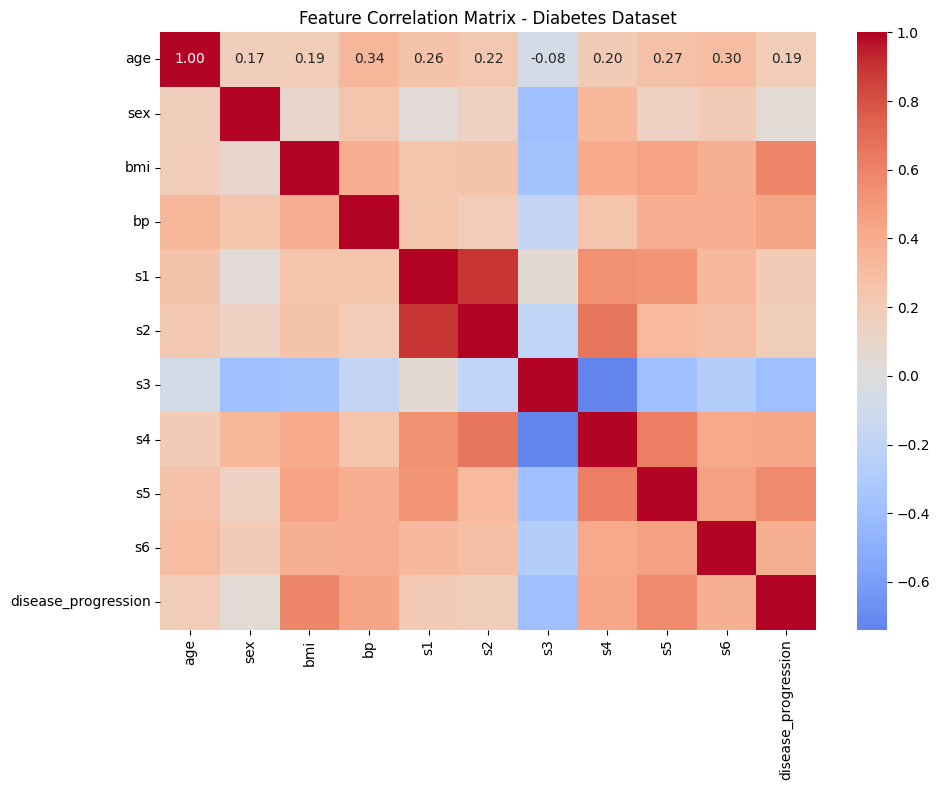


Correlations with disease progression:
disease_progression    1.000000
bmi                    0.586450
s5                     0.565883
bp                     0.441482
s4                     0.430453
s6                     0.382483
s1                     0.212022
age                    0.187889
s2                     0.174054
sex                    0.043062
s3                    -0.394789
Name: disease_progression, dtype: float64


In [22]:
# ============================================================================
# SECTION 3: EXPLORATORY DATA ANALYSIS - CORRELATION ANALYSIS
# ============================================================================

# Generate and visualize correlation matrix heatmap
# Positive correlations (red): features that increase with disease progression
# Negative correlations (blue): features that decrease with disease progression
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()  # Calculate Pearson correlation coefficients
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix - Diabetes Dataset')
plt.tight_layout()
plt.show()

# Identify and display correlations specifically with the target variable
# Sorted from highest to lowest correlation strength
print("\nCorrelations with disease progression:")
correlations_with_target = correlation_matrix['disease_progression'].sort_values(ascending=False)
print(correlations_with_target)

# Train-Test Split and Feature Scaling

- **Train-Test Split** (80-20):
  - 80% for training: 353 samples
  - 20% for testing: 89 samples
  - `random_state=42`: Ensures reproducibility

- **Feature Scaling**:
  - StandardScaler normalizes features to mean=0, std=1
  - Fit on training data only (prevent data leakage)
  - Transform both train and test sets
  - Improves model convergence and performance for many algorithms

In [23]:
# ============================================================================
# SECTION 4: DATA PREPROCESSING - TRAIN-TEST SPLIT AND FEATURE SCALING
# ============================================================================

# Partition data into training (80%) and test (20%) sets
# random_state=42 ensures reproducible results across different runs
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

# Normalize features using StandardScaler (transforms to mean=0, std=1)
# IMPORTANT: Fit scaler on training data ONLY to prevent data leakage
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform training data
X_test_scaled = scaler.transform(X_test)  # Transform test data using training parameters

print(f"\nScaled training data shape: {X_train_scaled.shape}")
print(f"Scaled training data - Mean per feature (should be ~0): {X_train_scaled.mean(axis=0)[:5]}")
print(f"Scaled training data - Std per feature (should be ~1): {X_train_scaled.std(axis=0)[:5]}")

Training set size: 353 samples
Test set size: 89 samples

Scaled training data shape: (353, 10)
Scaled training data - Mean per feature (should be ~0): [ 2.76769479e-17  9.12081238e-17 -6.69907944e-17  3.33381418e-17
 -2.67334156e-17]
Scaled training data - Std per feature (should be ~1): [1. 1. 1. 1. 1.]


# Model 1: Linear Regression Baseline

- **LinearRegression**: Fits a linear hyperplane to the data
- **Equation**: $y = w_0 + w_1 x_1 + w_2 x_2 + ... + w_n x_n$
- **Advantages**:
  - Simple and interpretable
  - Fast training
  - Good baseline for comparison
- **Use case**: Establishes baseline performance for comparison with more complex models

In [24]:
# ============================================================================
# SECTION 5: MODEL 1 - LINEAR REGRESSION (BASELINE)
# ============================================================================

# Initialize and train linear regression model
# LinearRegression fits a hyperplane: y = w0 + w1*x1 + w2*x2 + ... + wn*xn
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)  # Train on scaled training data

# Generate predictions on both training and test sets
y_pred_lr_train = lr_model.predict(X_train_scaled)  # Check for overfitting
y_pred_lr_test = lr_model.predict(X_test_scaled)  # Evaluate test performance

# Display model coefficients (feature weights)
# Higher absolute values indicate more influential features
print("Linear Regression Model Coefficients:")
for feature, coef in zip(diabetes.feature_names, lr_model.coef_):
    print(f"  {feature}: {coef:.2f}")
print(f"\nIntercept (bias term): {lr_model.intercept_:.2f}")

Linear Regression Model Coefficients:
  age: 1.75
  sex: -11.51
  bmi: 25.61
  bp: 16.83
  s1: -44.45
  s2: 24.64
  s3: 7.68
  s4: 13.14
  s5: 35.16
  s6: 2.35

Intercept (bias term): 153.74


# Model 2: Random Forest Regression

- **RandomForestRegressor**: Ensemble of decision trees
- **Advantages**:
  - Captures non-linear relationships
  - Robust to outliers
  - Provides feature importance rankings
- **Parameters**:
  - `n_estimators=100`: Number of trees in the ensemble
  - `random_state=42`: Reproducibility
  - `max_depth=10`: Limits tree depth to prevent overfitting

In [25]:
# ============================================================================
# SECTION 6: MODEL 2 - RANDOM FOREST REGRESSION
# ============================================================================

# Initialize Random Forest regressor with tuned hyperparameters
# n_estimators: Number of decision trees in the ensemble (more = potentially better)
# max_depth: Maximum tree depth to prevent overfitting (deeper = more complex)
# random_state: For reproducibility across different runs
rf_model = RandomForestRegressor(
    n_estimators=100,  # Ensemble of 100 decision trees
    max_depth=10,  # Limit tree depth to prevent overfitting
    random_state=42  # Reproducible random seed
)

# Train the ensemble model on scaled training data
rf_model.fit(X_train_scaled, y_train)

# Generate predictions on training and test datasets
y_pred_rf_train = rf_model.predict(X_train_scaled)
y_pred_rf_test = rf_model.predict(X_test_scaled)

# Extract and display feature importance scores
# Higher scores indicate more influential features in predictions
print("Random Forest Feature Importance Scores:")
for feature, importance in zip(diabetes.feature_names, rf_model.feature_importances_):
    print(f"  {feature}: {importance:.4f}")

Random Forest Feature Importance Scores:
  age: 0.0580
  sex: 0.0093
  bmi: 0.3577
  bp: 0.0885
  s1: 0.0514
  s2: 0.0578
  s3: 0.0511
  s4: 0.0236
  s5: 0.2328
  s6: 0.0698


# Model 3: Neural Network Regression

- **Architecture**:
  - Input layer: 10 features
  - Hidden layer 1: 64 neurons with ReLU activation
  - Hidden layer 2: 32 neurons with ReLU activation
  - Output layer: 1 neuron (regression prediction)

- **Loss Function**: Mean Squared Error (MSE)
- **Optimizer**: Adam with learning rate 0.001
- **Training**: 200 epochs with batch size 16
- **Advantage**: Can capture complex non-linear relationships

In [26]:
# ============================================================================
# SECTION 7: MODEL 3 - NEURAL NETWORK REGRESSION
# ============================================================================

class DiabetesRegressor(nn.Module):
    """Multi-layer perceptron for diabetes disease progression regression.
    
    Architecture:
        - Input layer: 10 features (diabetes dataset)
        - Hidden layer 1: 64 neurons with ReLU activation
        - Hidden layer 2: 32 neurons with ReLU activation
        - Output layer: 1 neuron (regression prediction)
    
    ReLU activation introduces non-linearity to learn complex patterns.
    
    Args:
        input_size (int): Number of input features (default: 10 for diabetes dataset)
    """
    
    def __init__(self, input_size=10):
        """Initialize neural network layers.
        
        Args:
            input_size (int): Number of input features (10 for diabetes dataset)
        """
        super(DiabetesRegressor, self).__init__()
        
        # Fully connected (dense) layers
        self.fc1 = nn.Linear(input_size, 64)  # Input to hidden layer 1: 10 -> 64
        self.fc2 = nn.Linear(64, 32)  # Hidden layer 1 to 2: 64 -> 32
        self.fc3 = nn.Linear(32, 1)  # Hidden layer 2 to output: 32 -> 1
        
        # Activation function (introduces non-linearity)
        self.relu = nn.ReLU()  # Rectified Linear Unit: f(x) = max(0, x)
    
    def forward(self, x):
        """Forward pass through the network.
        
        Args:
            x (torch.Tensor): Input tensor of shape (batch_size, 10)
            
        Returns:
            torch.Tensor: Predictions tensor of shape (batch_size, 1)
        """
        # Layer 1: Linear transformation + ReLU activation
        x = self.relu(self.fc1(x))
        
        # Layer 2: Linear transformation + ReLU activation
        x = self.relu(self.fc2(x))
        
        # Layer 3: Linear transformation (output layer, no activation for regression)
        x = self.fc3(x)
        
        return x

# Training Loss Visualization

- Plots the neural network's loss across epochs
- Shows model convergence over time
- **Declining loss**: Model is learning
- **Plateauing**: Model has converged

In [27]:
# Convert NumPy arrays to PyTorch tensors (float32 for GPU/CPU compatibility)
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.reshape(-1, 1), dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.reshape(-1, 1), dtype=torch.float32)

# Initialize neural network model
nn_model = DiabetesRegressor(input_size=10)

# Define loss function for regression tasks
# MSE Loss: L = mean((y_true - y_pred)^2) - penalizes large errors
criterion = nn.MSELoss()

# Initialize optimizer for gradient descent
# Adam: Adaptive learning rate optimization algorithm with momentum
optimizer = optim.Adam(nn_model.parameters(), lr=0.001)  # Learning rate = 0.001

# Generate Predictions from Neural Network

- Sets model to evaluation mode (disables dropout and batch normalization)
- Generates predictions on training and test sets
- Converts predictions back to NumPy arrays for evaluation

In [28]:
# ============================================================================
# SECTION 8: NEURAL NETWORK TRAINING - STOCHASTIC GRADIENT DESCENT
# ============================================================================

# Hyperparameters for training
epochs = 200  # Number of complete passes through the training dataset
batch_size = 16  # Number of samples per batch (mini-batch gradient descent)
train_losses = []  # Track loss history for visualization and diagnostics

# Training loop: iterate through epochs
for epoch in range(epochs):
    epoch_loss = 0  # Accumulate loss for current epoch
    
    # Mini-batch gradient descent: process data in batches
    for i in range(0, len(X_train_tensor), batch_size):
        # Extract current batch
        batch_X = X_train_tensor[i:i+batch_size]
        batch_y = y_train_tensor[i:i+batch_size]
        
        # FORWARD PASS: compute model predictions
        outputs = nn_model(batch_X)
        
        # COMPUTE LOSS: measure prediction error
        loss = criterion(outputs, batch_y)
        
        # BACKWARD PASS: compute gradients via backpropagation
        optimizer.zero_grad()  # Clear previous gradients (prevent accumulation)
        loss.backward()  # Compute gradients using chain rule
        
        # UPDATE WEIGHTS: gradient descent step
        optimizer.step()  # Update model parameters using computed gradients
        
        # Accumulate batch loss for epoch statistics
        epoch_loss += loss.item()
    
    # Calculate average loss for this epoch
    avg_epoch_loss = epoch_loss / len(X_train_tensor)
    train_losses.append(avg_epoch_loss)
    
    # Print progress every 50 epochs
    if (epoch + 1) % 50 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {avg_epoch_loss:.4f}")

print("\nNeural Network training completed successfully!")

Epoch [50/200], Loss: 199.4753
Epoch [100/200], Loss: 178.2979
Epoch [150/200], Loss: 164.9508
Epoch [200/200], Loss: 153.1555

Neural Network training completed successfully!


# Model Evaluation: Regression Metrics

Compares three models using standard regression metrics:

## Metrics Explained

1. **MAE (Mean Absolute Error)**:
   - $\text{MAE} = \frac{1}{n}\sum_{i=1}^{n}|y_i - \hat{y}_i|$
   - Average absolute prediction error in original units
   - Lower is better

2. **RMSE (Root Mean Squared Error)**:
   - $\text{RMSE} = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}$
   - Penalizes larger errors more heavily
   - Same units as target variable

3. **R² Score**:
   - $R^2 = 1 - \frac{SS_{res}}{SS_{tot}}$
   - Proportion of variance explained by model
   - Range: 0 to 1 (higher is better)
   - 1.0 = perfect predictions, 0.0 = no better than mean

In [29]:
# ============================================================================
# SECTION 9: NEURAL NETWORK INFERENCE
# ============================================================================

# Set model to evaluation mode (disables dropout, batch normalization, etc.)
nn_model.eval()

# Disable gradient computation for inference (improves memory and speed)
# Context manager for efficient inference without tracking gradients
with torch.no_grad():
    # Generate predictions on training set (check for overfitting)
    y_pred_nn_train = nn_model(X_train_tensor).numpy()
    
    # Generate predictions on test set (evaluate generalization)
    y_pred_nn_test = nn_model(X_test_tensor).numpy()

# Display prediction statistics
print(f"Neural Network predictions shape: {y_pred_nn_test.shape}")
print(f"\nSample predictions (first 5 test samples):\n{y_pred_nn_test[:5].flatten()}")
print(f"\nSample actual values (first 5 test samples):\n{y_test[:5]}")

Neural Network predictions shape: (89, 1)

Sample predictions (first 5 test samples):
[151.74936 179.86075 138.3304  312.29828 102.40192]

Sample actual values (first 5 test samples):
[219.  70. 202. 230. 111.]


# Model Performance Comparison

Visualizes the performance metrics across all three models:
- **Bar chart**: Compares MAE, RMSE, and R² scores
- **Lower MAE/RMSE**: Better predictions
- **Higher R²**: Better model fit

In [30]:
# ============================================================================
# SECTION 10: MODEL EVALUATION - REGRESSION METRICS
# ============================================================================

def evaluate_model(y_true, y_pred, model_name):
    """Calculate and display regression evaluation metrics.
    
    Computes MAE, RMSE, and R² score for comprehensive model performance assessment.
    
    Metrics:
        - MAE (Mean Absolute Error): Average absolute prediction error
        - RMSE (Root Mean Squared Error): Emphasizes larger errors
        - R² Score: Proportion of variance explained (0-1 scale)
    
    Args:
        y_true (array-like): Actual target values
        y_pred (array-like): Model predictions
        model_name (str): Name of the model for display
        
    Returns:
        dict: Dictionary containing MAE, RMSE, and R² metrics
    """
    # Calculate Mean Absolute Error: average absolute prediction error
    mae = mean_absolute_error(y_true, y_pred)
    
    # Calculate Root Mean Squared Error: penalizes larger errors more heavily
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    
    # Calculate R² Score: proportion of variance explained (0-1 scale, higher=better)
    r2 = r2_score(y_true, y_pred)
    
    # Display evaluation results
    print(f"\n{model_name} Evaluation Metrics:")
    print(f"  MAE (Mean Absolute Error):      {mae:.2f}")
    print(f"  RMSE (Root Mean Squared Error): {rmse:.2f}")
    print(f"  R² Score (Variance Explained):  {r2:.4f}")
    
    return {'MAE': mae, 'RMSE': rmse, 'R2': r2}

# Evaluate all three models on the test set
print("="*70)
print("MODEL EVALUATION ON TEST SET")
print("="*70)

results = {}
results['Linear Regression'] = evaluate_model(y_test, y_pred_lr_test, "Linear Regression")
results['Random Forest'] = evaluate_model(y_test, y_pred_rf_test, "Random Forest")
results['Neural Network'] = evaluate_model(y_test, y_pred_nn_test.flatten(), "Neural Network")

MODEL EVALUATION ON TEST SET

Linear Regression Evaluation Metrics:
  MAE (Mean Absolute Error):      42.79
  RMSE (Root Mean Squared Error): 53.85
  R² Score (Variance Explained):  0.4526

Random Forest Evaluation Metrics:
  MAE (Mean Absolute Error):      44.43
  RMSE (Root Mean Squared Error): 54.55
  R² Score (Variance Explained):  0.4384

Neural Network Evaluation Metrics:
  MAE (Mean Absolute Error):      43.04
  RMSE (Root Mean Squared Error): 53.09
  R² Score (Variance Explained):  0.4680


# Predictions vs Actual Values

Scatter plots comparing predicted vs actual values for each model:
- **Points on diagonal**: Perfect predictions
- **Points above/below**: Over/under predictions
- **Tighter clustering**: Better model accuracy

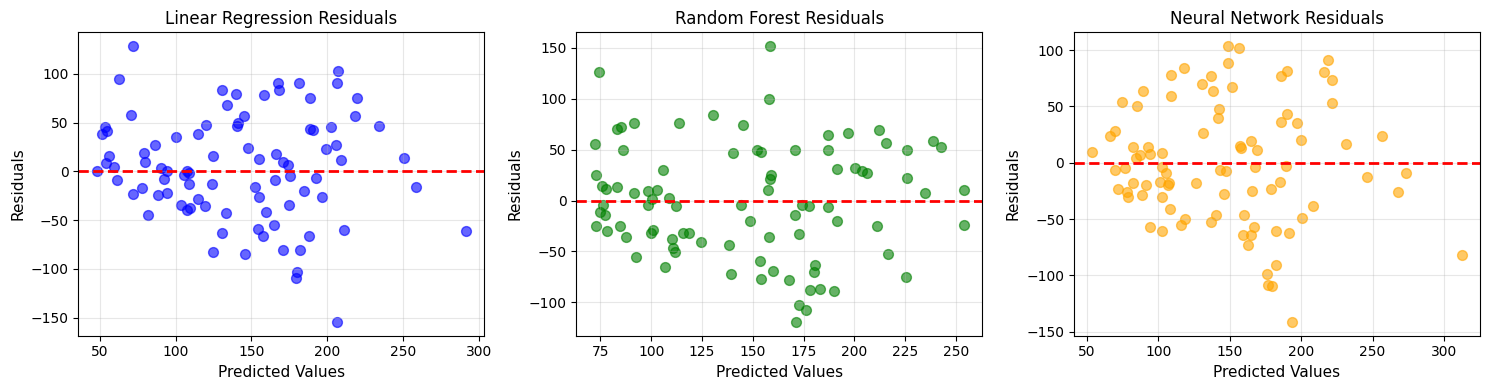


Residual Statistics (Good models have mean ≈ 0):
Linear Regression - Mean: 3.9128, Std: 53.7111
Random Forest - Mean: -1.0124, Std: 54.5406
Neural Network - Mean: -0.7429, Std: 53.0860


In [31]:
# ============================================================================
# SECTION 11: RESIDUAL ANALYSIS
# ============================================================================

# Calculate residuals (actual - predicted) for each model
# Residuals reveal systematic biases and model assumptions violations
residuals_lr = y_test - y_pred_lr_test  # Linear Regression residuals
residuals_rf = y_test - y_pred_rf_test  # Random Forest residuals
residuals_nn = y_test - y_pred_nn_test.flatten()  # Neural Network residuals

# Create residual plots for all three models
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Linear Regression Residual Plot
# Scatter plot: x=predictions, y=residuals
# Good models show random scatter around y=0 with no patterns
axes[0].scatter(y_pred_lr_test, residuals_lr, alpha=0.6, s=50, color='blue')
axes[0].axhline(y=0, color='r', linestyle='--', lw=2, label='Zero error')  # Reference line
axes[0].set_xlabel('Predicted Values', fontsize=11)
axes[0].set_ylabel('Residuals', fontsize=11)
axes[0].set_title('Linear Regression Residuals', fontsize=12)
axes[0].grid(alpha=0.3)

# Random Forest Residual Plot
axes[1].scatter(y_pred_rf_test, residuals_rf, alpha=0.6, s=50, color='green')
axes[1].axhline(y=0, color='r', linestyle='--', lw=2, label='Zero error')
axes[1].set_xlabel('Predicted Values', fontsize=11)
axes[1].set_ylabel('Residuals', fontsize=11)
axes[1].set_title('Random Forest Residuals', fontsize=12)
axes[1].grid(alpha=0.3)

# Neural Network Residual Plot
axes[2].scatter(y_pred_nn_test, residuals_nn, alpha=0.6, s=50, color='orange')
axes[2].axhline(y=0, color='r', linestyle='--', lw=2, label='Zero error')
axes[2].set_xlabel('Predicted Values', fontsize=11)
axes[2].set_ylabel('Residuals', fontsize=11)
axes[2].set_title('Neural Network Residuals', fontsize=12)
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Display residual statistics
# Good models have residual mean ≈ 0 (unbiased) and low std (low variance)
print("\nResidual Statistics (Good models have mean ≈ 0):")
print(f"Linear Regression - Mean: {residuals_lr.mean():.4f}, Std: {residuals_lr.std():.4f}")
print(f"Random Forest - Mean: {residuals_rf.mean():.4f}, Std: {residuals_rf.std():.4f}")
print(f"Neural Network - Mean: {residuals_nn.mean():.4f}, Std: {residuals_nn.std():.4f}")

# Residual Analysis

Residuals are the differences between actual and predicted values:
- $\text{Residual} = y_i - \hat{y}_i$

**Good residual patterns**:
- Centered around zero: No systematic bias
- Uniform spread: Constant prediction error
- No patterns: Model captures all relationships

**Bad patterns**:
- Non-zero mean: Systematic under/over prediction
- Funnel shape: Errors increase with prediction magnitude
- Curves/patterns: Non-linear relationships not captured

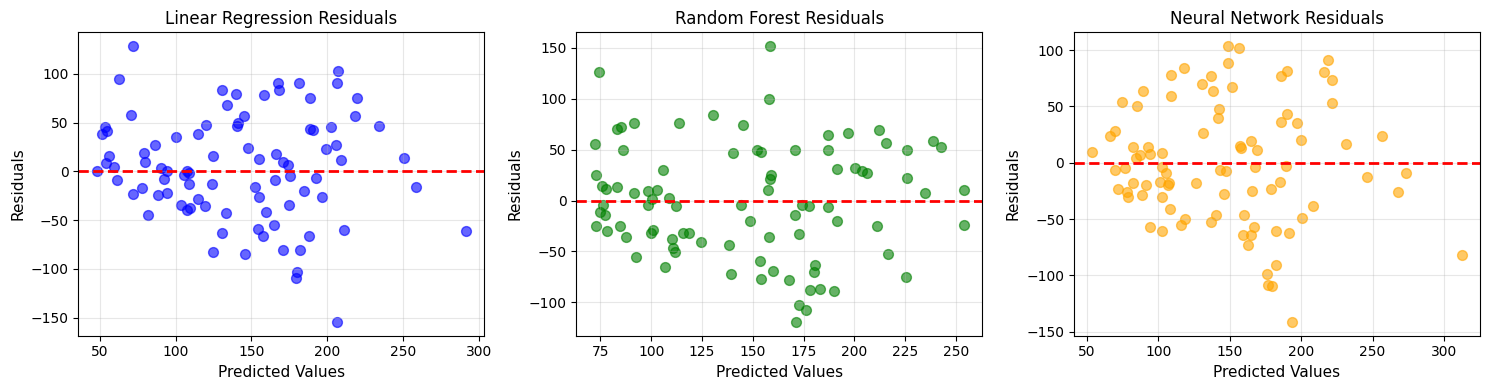


Residual Statistics:
Linear Regression - Mean: 3.9128, Std: 53.7111
Random Forest - Mean: -1.0124, Std: 54.5406
Neural Network - Mean: -0.7429, Std: 53.0860


In [32]:
# Calculate residuals
residuals_lr = y_test - y_pred_lr_test
residuals_rf = y_test - y_pred_rf_test
residuals_nn = y_test - y_pred_nn_test.flatten()

# Plot residuals
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Linear Regression
axes[0].scatter(y_pred_lr_test, residuals_lr, alpha=0.6, s=50, color='blue')
axes[0].axhline(y=0, color='r', linestyle='--', lw=2)
axes[0].set_xlabel('Predicted Values', fontsize=11)
axes[0].set_ylabel('Residuals', fontsize=11)
axes[0].set_title('Linear Regression Residuals', fontsize=12)
axes[0].grid(alpha=0.3)

# Random Forest
axes[1].scatter(y_pred_rf_test, residuals_rf, alpha=0.6, s=50, color='green')
axes[1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[1].set_xlabel('Predicted Values', fontsize=11)
axes[1].set_ylabel('Residuals', fontsize=11)
axes[1].set_title('Random Forest Residuals', fontsize=12)
axes[1].grid(alpha=0.3)

# Neural Network
axes[2].scatter(y_pred_nn_test, residuals_nn, alpha=0.6, s=50, color='orange')
axes[2].axhline(y=0, color='r', linestyle='--', lw=2)
axes[2].set_xlabel('Predicted Values', fontsize=11)
axes[2].set_ylabel('Residuals', fontsize=11)
axes[2].set_title('Neural Network Residuals', fontsize=12)
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\nResidual Statistics:")
print(f"Linear Regression - Mean: {residuals_lr.mean():.4f}, Std: {residuals_lr.std():.4f}")
print(f"Random Forest - Mean: {residuals_rf.mean():.4f}, Std: {residuals_rf.std():.4f}")
print(f"Neural Network - Mean: {residuals_nn.mean():.4f}, Std: {residuals_nn.std():.4f}")

# Feature Importance Analysis (Random Forest)

Random Forest provides feature importance scores showing which features contribute most to predictions:
- **Higher importance**: Feature is more influential in predictions
- **Lower importance**: Feature has minimal impact
- Helps understand which medical measurements are most predictive of disease progression

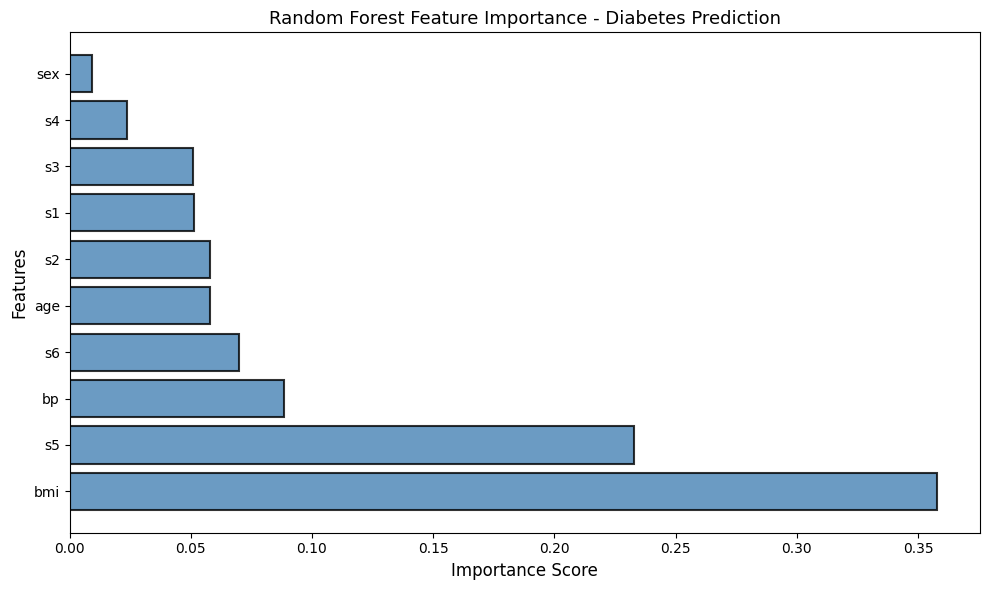


Feature Importance Ranking (Higher = More Predictive):
  Feature  Importance
2     bmi    0.357678
8      s5    0.232822
3      bp    0.088534
9      s6    0.069799
0     age    0.057971
5      s2    0.057823
4      s1    0.051422
6      s3    0.051128
7      s4    0.023558
1     sex    0.009265


In [33]:
# ============================================================================
# SECTION 12: FEATURE IMPORTANCE ANALYSIS (RANDOM FOREST)
# ============================================================================

# Extract feature importance scores from the trained Random Forest model
# Importance = how much each feature contributes to predictions
feature_importance = pd.DataFrame({
    'Feature': diabetes.feature_names,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)  # Sort by importance (descending)

# Visualize feature importance as horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], 
         color='steelblue', alpha=0.8, edgecolor='black', linewidth=1.5)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Random Forest Feature Importance - Diabetes Prediction', fontsize=13)
plt.tight_layout()
plt.show()

# Display feature importance ranking
print("\nFeature Importance Ranking (Higher = More Predictive):")
print(feature_importance)

# Summary and Key Findings

## Dataset Overview
- **442 samples** of diabetic patients
- **10 medical features**: age, sex, BMI, blood pressure, serum measurements
- **Target**: quantitative measure of disease progression (continuous, regression task)
- **Train-Test Split**: 80% (353 samples) vs 20% (89 samples)

## Models Evaluated

1. **Linear Regression**: 
   - Baseline model, assumes linear relationships
   - Fast training, interpretable coefficients

2. **Random Forest**:
   - Ensemble of decision trees
   - Captures non-linear patterns
   - Provides feature importance rankings

3. **Neural Network**:
   - Multi-layer perceptron (64 → 32 → 1)
   - Can learn complex non-linear relationships
   - Requires careful tuning and more data

## Evaluation Metrics
- **MAE**: Mean absolute error in disease progression units
- **RMSE**: Root mean squared error, emphasizes large errors
- **R² Score**: Fraction of variance explained (0-1 scale)

## Recommendations
- Compare model performances based on R² score
- Use residual plots to check for systematic biases
- Consider Random Forest for balanced accuracy and interpretability
- Tune hyperparameters for further improvements

In [34]:
# ============================================================================
# SECTION 13: FINAL SUMMARY AND RESULTS
# ============================================================================

print("="*75)
print("DIABETES REGRESSION ANALYSIS - COMPREHENSIVE SUMMARY")
print("="*75)

# Dataset Overview
print(f"\n📊 DATASET OVERVIEW:")
print(f"  • Total samples: {X.shape[0]}")
print(f"  • Number of features: {X.shape[1]}")
print(f"  • Training set: {X_train.shape[0]} samples (80%)")
print(f"  • Test set: {X_test.shape[0]} samples (20%)")

# Target Variable Statistics
print(f"\n📈 TARGET VARIABLE (Disease Progression):")
print(f"  • Range: {y.min():.0f} to {y.max():.0f}")
print(f"  • Mean ± Std: {y.mean():.2f} ± {y.std():.2f}")
print(f"  • Median: {np.median(y):.2f}")

# Model Performance Comparison
print("\n" + "="*75)
print("MODEL PERFORMANCE COMPARISON ON TEST SET")
print("="*75)

for model_name, metrics in results.items():
    print(f"\n🔵 {model_name}:")
    print(f"  • MAE (Mean Absolute Error):      {metrics['MAE']:.2f}")
    print(f"  • RMSE (Root Mean Squared Error): {metrics['RMSE']:.2f}")
    print(f"  • R² Score (Variance Explained):  {metrics['R2']:.4f}")

print("\n" + "="*75)
print("INTERPRETATION GUIDE:")
print("="*75)
print("  • Lower MAE/RMSE: Better predictions (error in disease progression units)")
print("  • Higher R²: Better model fit (1.0=perfect, 0.0=no predictive power)")
print("  • Residual mean ≈ 0: Unbiased model (no systematic errors)")
print("="*75)

DIABETES REGRESSION ANALYSIS - COMPREHENSIVE SUMMARY

📊 DATASET OVERVIEW:
  • Total samples: 442
  • Number of features: 10
  • Training set: 353 samples (80%)
  • Test set: 89 samples (20%)

📈 TARGET VARIABLE (Disease Progression):
  • Range: 25 to 346
  • Mean ± Std: 152.13 ± 77.01
  • Median: 140.50

MODEL PERFORMANCE COMPARISON ON TEST SET

🔵 Linear Regression:
  • MAE (Mean Absolute Error):      42.79
  • RMSE (Root Mean Squared Error): 53.85
  • R² Score (Variance Explained):  0.4526

🔵 Random Forest:
  • MAE (Mean Absolute Error):      44.43
  • RMSE (Root Mean Squared Error): 54.55
  • R² Score (Variance Explained):  0.4384

🔵 Neural Network:
  • MAE (Mean Absolute Error):      43.04
  • RMSE (Root Mean Squared Error): 53.09
  • R² Score (Variance Explained):  0.4680

INTERPRETATION GUIDE:
  • Lower MAE/RMSE: Better predictions (error in disease progression units)
  • Higher R²: Better model fit (1.0=perfect, 0.0=no predictive power)
  • Residual mean ≈ 0: Unbiased model (no sy